In [1]:
import os

%pwd

'c:\\09_AHFID\\via-cervix-ai\\notebook'

In [2]:
os.chdir("../")

%pwd

'c:\\09_AHFID\\via-cervix-ai'

In [3]:
!ls -a

.
..
.git
.gitignore
LICENSE
README.md
notebook
requirements.txt
setup.py
template.py
venv-ave
via-cervix
via-cervix.zip


In [4]:
!ls -lh

total 23M
-rw-r--r-- 1 walea 197612 1.1K Sep  2 17:56 LICENSE
-rw-r--r-- 1 walea 197612   15 Sep  2 17:56 README.md
drwxr-xr-x 1 walea 197612    0 Sep  2 22:51 notebook
-rw-r--r-- 1 walea 197612   91 Sep  2 21:05 requirements.txt
-rw-r--r-- 1 walea 197612  785 Sep  2 18:53 setup.py
-rw-r--r-- 1 walea 197612 1.4K Sep  2 18:58 template.py
drwxr-xr-x 1 walea 197612    0 Sep  2 21:17 venv-ave
drwxr-xr-x 1 walea 197612    0 Sep  2 22:46 via-cervix
-rw-r--r-- 1 walea 197612  23M Sep  2 21:57 via-cervix.zip


In [5]:
# import libraries
import gdown
import zipfile
import os
from pathlib import Path
import glob

# Create artifacts directory
artifacts_dir = Path("artifacts")
artifacts_dir.mkdir(exist_ok=True)

# Define file paths
file_id = "1lFvuTpzdfSAckyjtHZzE2HWqsH25sa1q"
zip_path = artifacts_dir / "via-cervix.zip"
extract_dir = artifacts_dir / "via-cervix"

# Download file from Google Drive
if not zip_path.exists():
    url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(url, str(zip_path), quiet=False)
else:
    print("File already exists. Skipping download.")

# Unzip the dataset
if not extract_dir.exists():
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
    print(f"Extracted to {extract_dir}/")
else:
    print("Data already extracted.")

Downloading...
From: https://drive.google.com/uc?id=1lFvuTpzdfSAckyjtHZzE2HWqsH25sa1q
To: c:\09_AHFID\via-cervix-ai\artifacts\via-cervix.zip
100%|██████████| 23.9M/23.9M [00:11<00:00, 2.11MB/s]


Extracted to artifacts\via-cervix/


In [6]:
# Sanity check: count images in each subfolder
subfolders = [f for f in extract_dir.iterdir() if f.is_dir()]
for folder in subfolders:
    image_count = len(glob.glob(str(folder / "*.jpg"))) + len(glob.glob(str(folder / "*.png")))
    print(f"{folder.name}: {image_count} images")

# Total image count
total_images = len(list(extract_dir.rglob("*.jpg"))) + len(list(extract_dir.rglob("*.png")))
print(f"\nTotal images found: {total_images}")

Data: 0 images

Total images found: 190


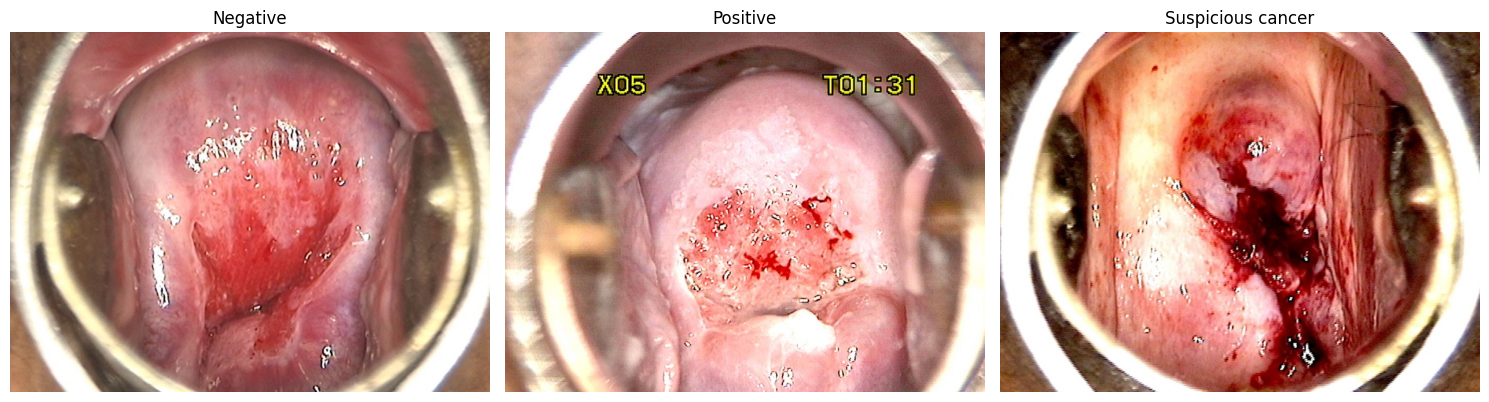

In [9]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Explicitly point to subfolders inside artifacts/via-cervix
subfolders = [f for f in extract_dir.iterdir() if f.is_dir()]

# Preview one random image per class
fig, axes = plt.subplots(1, len(subfolders), figsize=(15, 5))

# Ensure axes is iterable
if len(subfolders) == 1:
    axes = [axes]

for ax, folder in zip(axes, subfolders):
    # Collect images with common extensions
    images = []
    for ext in ["*.jpg", "*.jpeg", "*.png", "*.JPG", "*.JPEG", "*.PNG"]:
        images.extend(folder.glob(ext))

    if images:  # Only proceed if images exist
        img_path = random.choice(images)
        img = mpimg.imread(str(img_path))  # ensure str path
        ax.imshow(img)
        ax.set_title(folder.name, fontsize=12)
        ax.axis("off")
    else:
        ax.set_title(f"{folder.name}\n(no images)", fontsize=12)
        ax.axis("off")

plt.tight_layout()
plt.show()

